Tax Scale

estimates the change in tax revenue when you modify the personal income tax system. The tool allows you to modify the tax brackets, the tax rates, and the indirect and company tax offset, and outputs an estimated change in revenue along with plots of the marginal tax rates and the average tax rates

In [1]:
lowtax = dict({'lownum' : 0, 'highnum' : 14000, 'percent' : 10.5})
midtax = dict({'percent' : 17.5, 'lownum' : 14000, 'highnum' : 48000})
hightax = dict({'percent' : 30, 'lownum' : 48000, 'highnum' : 70000})
supertax = dict({'percent' : 33, 'lownum' : 70000, 'highnum' : float("inf")})

In [2]:
lowtax

{'highnum': 14000, 'lownum': 0, 'percent': 10.5}

In [3]:
midtax

{'highnum': 48000, 'lownum': 14000, 'percent': 17.5}

In [4]:
hightax

{'highnum': 70000, 'lownum': 48000, 'percent': 30}

In [5]:
supertax

{'highnum': inf, 'lownum': 70000, 'percent': 33}

In [6]:
%matplotlib inline

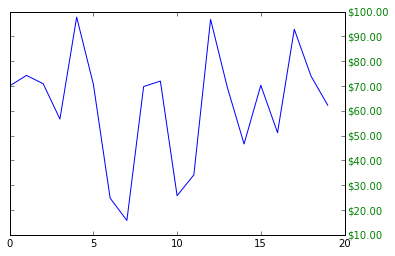

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True
    tick.label2.set_color('green')

plt.show()                                                  

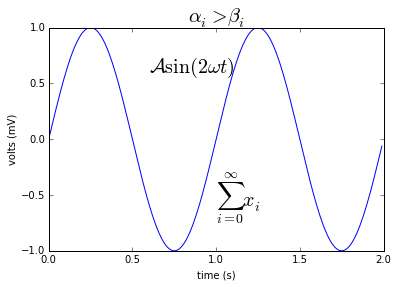

In [8]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()


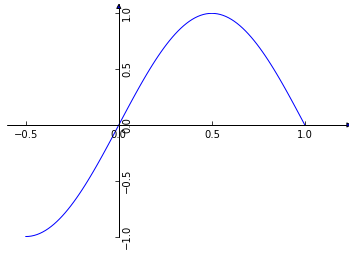

In [9]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np

if 1:
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)

    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_axisline_style("-|>")
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

    x = np.linspace(-0.5, 1., 100)
    ax.plot(x, np.sin(x*np.pi))

    plt.show()

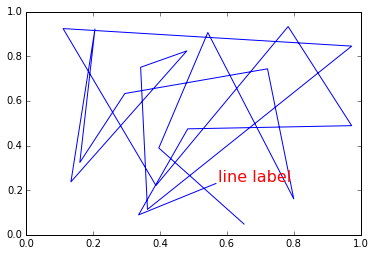

In [10]:
"""
=======================
Artist within an artist
=======================

Show how to override basic methods so an artist can contain another
artist.  In this case, the line contains a Text instance to label it.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext


class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)

        # we can't access the label attr until *after* the line is
        # inited
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        lines.Line2D.set_figure(self, figure)

    def set_axes(self, axes):
        self.text.set_axes(axes)
        lines.Line2D.set_axes(self, axes)

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        lines.Line2D.set_transform(self, transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        lines.Line2D.set_data(self, x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        lines.Line2D.draw(self, renderer)
        self.text.draw(renderer)


fig, ax = plt.subplots()
x, y = np.random.rand(2, 20)
line = MyLine(x, y, mfc='red', ms=12, label='line label')
#line.text.set_text('line label')
line.text.set_color('red')
line.text.set_fontsize(16)


ax.add_line(line)


plt.show()


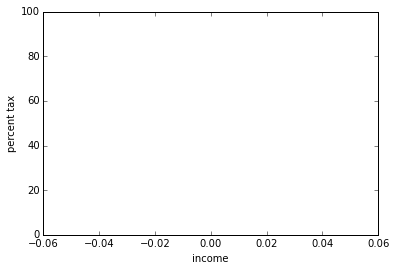

In [11]:
import matplotlib.pyplot as plt
for i in range(0,29):
    plt.plot([i])
plt.ylabel('percent tax')
for i in range(0, 100):
    plt.plot([i])
plt.xlabel('income')
plt.show()

In [12]:
import matplotlib.pyplot as plt

for i in range(0,29):
    plt.plot([i])
#plt.plot([1,2,3,4], [1,4,9,16], 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('percent tax')
plt.xlabel('income')
plt.
plt.show()


SyntaxError: invalid syntax (<ipython-input-12-3a8d1c5316ff>, line 9)

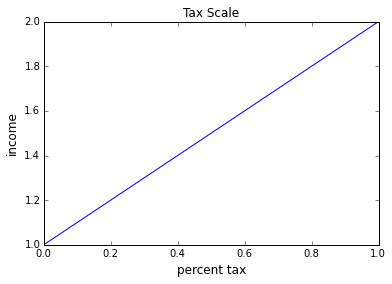

In [18]:
plt.rcParams['savefig.facecolor'] = "0.8"

def example_plot(ax, fontsize=8):
     ax.plot([1, 2])
     ax.locator_params(nbins=6)
     ax.set_xlabel('percent tax', fontsize=fontsize)
     ax.set_ylabel('income', fontsize=fontsize)
     ax.set_title('Tax Scale', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=12)
